Criteria	Points

Import libraries	2

Read data	2

Clean data, print shape, identify missing value and print data type	4

Identify outlier (use boxplot), perform feature analysis and data quality check 3

Summarize data, convert features	4

Create data dictionary	2

Use data visualization to plot correlation matrix.	2

Plot the distribution of 'bmi, 'age' & 'charges', measure their skewness and identify any outliers.	4

Explain about missing value treatment & outliers, identify them and treat them appropriately	3

Analyse categorical columns using box plot, Scatter plot & Bar plots	4

Use pair-plot to identify strong correlation among variables.	2

Do charges of people who smoke differ significantly from the people who don't?	7

Does bmi of males differ significantly from that of females?	7

Is the proportion of smokers significantly different in different genders?	7

Is the distribution of bmi across women with no children, one child and two children, the same?	7

Points	60




In [0]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read data from Great learning 
df = pd.read_csv('https://olympus.greatlearning.in/courses/10901/files/738970/download?verifier=AqNusHRsLhHmwOt2H8ewD6fX9bPLlhj3YGHuvd5w&wrap=1')

In [0]:
# shows top 5 rows of the data frame with heads
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [0]:
# Data type of each attribute
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [0]:
#Shape of the data 
df.shape

(1338, 7)

In [0]:
#gives out null values if any
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [0]:
# 5 point summary of numerical attributes 
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [0]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

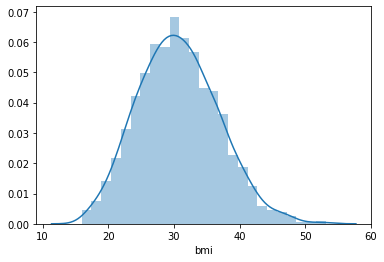

In [0]:
sns.distplot(df['bmi'])

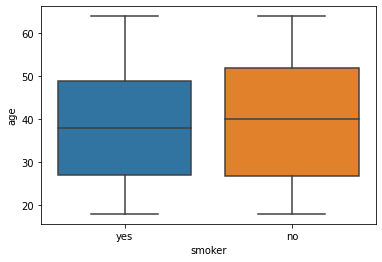

In [0]:
sns.boxplot('smoker','age',data=df)

In [0]:
#Is the proportion of smokers significantly different in different genders
pd.crosstab(df['sex'],df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


58 % male and 42% female who are smokers which is not significant 

In [0]:
#Is the proportion of smokers significantly different in different genders
pd.crosstab(df['sex'],df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


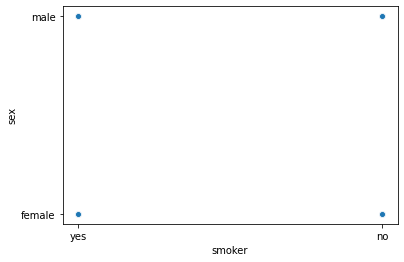

In [0]:
sns.scatterplot('smoker','sex' , data =df)

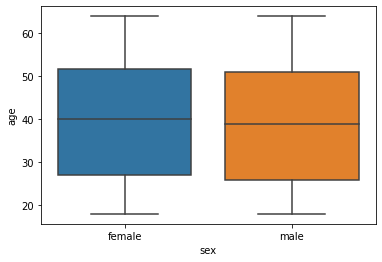

In [0]:
sns.boxplot('sex','age',data=df)

In [0]:
pd.pivot_table(df,'charges',index=['children','sex'],columns='smoker')

smoker                     no           yes
children sex                               
0        female   7688.318863  30685.059887
         male     7530.806677  31902.398075
1        female   8758.560884  30264.253915
         male     7837.147396  32904.876848
2        female   9921.777645  31663.833195
         male     9020.567024  35297.837461
3        female  10128.716357  30681.604257
         male     9025.530139  33869.169434
4        female  13937.674562           NaN
         male    10305.014255  26532.276933
5        female   8544.113050  19023.260000
         male     7931.658310           NaN

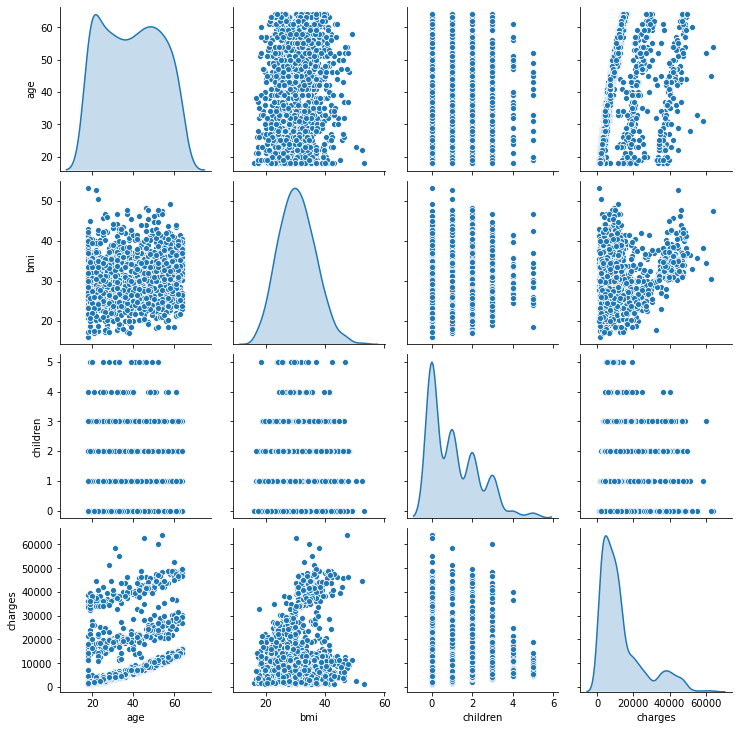

In [0]:
# diag_kind="kde" smoothen the graph 
sns.pairplot(df,diag_kind="kde")

no signigficant correlation can be determind from pair plot as all the points are scattered all over the space other than age and charges wwhich shows +ve correlation as when with increase in age the charges alos tend to go up 

age and bmi does not show any relation between them 
age and charges no clear relationship 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4569de978>,
      dtype=object)

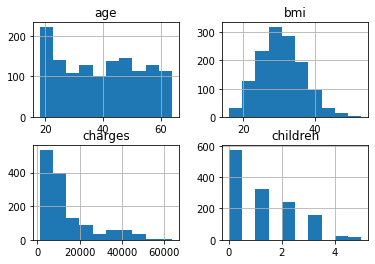

In [0]:
df.hist()

In [0]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


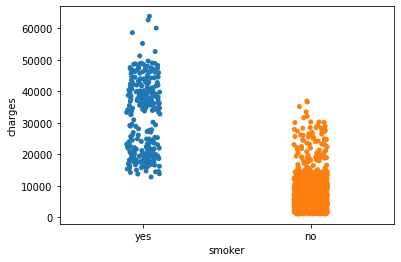

In [0]:
#Do charges of people who smoke differ significantly from the people who don't
sns.stripplot('smoker','charges',data=df,)

yes charge for smokers and non smokers are different as shown in scatter plot 

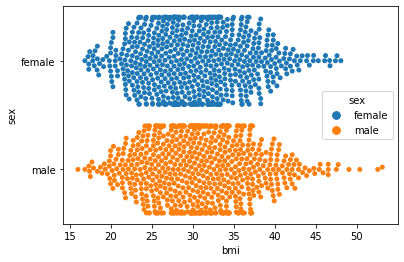

In [0]:
#Does bmi of males differ significantly from that of females
sns.swarmplot('bmi','sex',data=df,hue='sex')

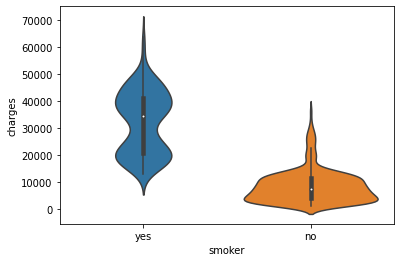

In [0]:
ax = sns.scatterplot('smoker','charges',data=df ,color = 'white')
ax = sns.violinplot('smoker','charges', data=df)

it can be seen from the data that people who smoke end up paying more charges than who do not smoke 

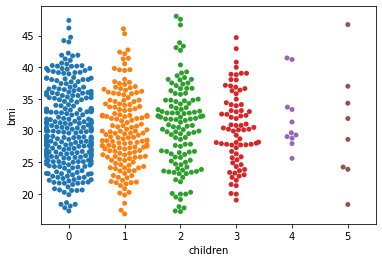

In [0]:
##Is the distribution of bmi across women with no children, one child and two children, the same
sns.swarmplot(df[df['sex']=='female']['children'],'bmi',data=df,dodge=True)


In [0]:
out_f = ['age','bmi','charges']

In [0]:
outliers= []
def det_outliers(data):

  threshold = 3
  mean = np.mean(data)
  std=np.std(data)

  for i in data:
    z_score= (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
      return outliers

In [0]:
outlier_pt = det_outliers(df)